### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

NaN

### Вариант 4

Automobile Data Set  

Название файла: imports-85.data

Ссылка: https://archive.ics.uci.edu/ml/datasets/Automobile  

Класс: symboling (столбец No 1)

Метод обработки пропущенных значений – среднее значение класса

Метод нормализации признаков – нормировка по норме L1

Алгоритм снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier)

Дополнительные базовые классификаторы:

- наивный байесовский классификатор

- классификатор ближайших соседей (к-во соседей = 5)

Комбинированный классификатор: VotingClassifier

Ансамблевые классификаторы: BaggingClassifier, GradientBoostingClassifier

Показатель качества модели – полнота (recall)

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [261]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
                "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
                "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
                "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
                "city-mpg", "highway-mpg", "price"]

my_data = pd.read_csv(url, names=column_names)
my_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если в признаках пропущенных значений нет, то удалите из набора данных записи, идентифицированные как выбросы при помощи метода кластеризации DBSCAN.

In [262]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

In [263]:
count_null = my_data['symboling'].isnull().sum()
if (count_null > 0):
  my_data = my_data.dropna(subset=['symboling'])
else:
  print("Количество пропущенных значений в столбце symboling:", count_null)

Количество пропущенных значений в столбце symboling: 0


In [264]:
my_data = my_data.replace('?', np.NaN)
my_data.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [265]:
numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                   'curb-weight', 'engine-size', 'bore', 'stroke',
                   'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                   'highway-mpg', 'price']

categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors',
                       'body-style', 'drive-wheels', 'engine-location',
                       'engine-type', 'num-of-cylinders', 'fuel-system']

In [266]:
for col in categorical_columns:
    le = LabelEncoder()
    my_data[col] = le.fit_transform(my_data[col].astype(str))

my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [267]:
for col in numeric_columns:
  my_data[col] = pd.to_numeric(my_data[col], errors='coerce')
  my_data[col] = my_data.groupby('symboling')[col].transform(lambda x: x.fillna(x.mean()))

my_data.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Пропущеннные значения в наборе данных присуствуют, но не в классе меток, мы не сократили записи, поэтому для примера удалим точки с выбросами при помощи метода кластеризации DBSCAN.

In [268]:
from sklearn.preprocessing import StandardScaler

In [269]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(my_data)

In [270]:
dbscan = DBSCAN(eps=4.0, min_samples=3)
labels = dbscan.fit_predict(data_scaled)

non_outliers = labels != -1
my_data_cleaned = my_data[non_outliers]
print(f"Размер до удаления: {my_data.shape}\nРазмер данных после удаления выбросов: {my_data_cleaned.shape}")

Размер до удаления: (205, 26)
Размер данных после удаления выбросов: (186, 26)


3. Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных не более четырех признаков.

In [271]:
from sklearn.ensemble import ExtraTreesClassifier

In [272]:
X = my_data_cleaned.drop('symboling', axis=1)
y = my_data_cleaned['symboling']

In [273]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [274]:
top_features = feature_importances['Feature'].head(4).tolist()
print(f"Четыре наиболее важных признака: {top_features}")

Четыре наиболее важных признака: ['normalized-losses', 'num-of-doors', 'height', 'wheel-base']


In [275]:
my_data_reduced = my_data_cleaned[top_features + ['symboling']]
my_data_reduced.head()

,normalized-losses,num-of-doors,height,wheel-base,symboling
3,164.000000,0,54.3,99.8,2
4,164.000000,0,54.3,99.4,2
5,125.689655,2,53.1,99.8,2
6,158.000000,0,55.7,105.8,1
7,128.574468,0,55.7,105.8,1


4. Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

In [276]:
from sklearn.preprocessing import normalize

In [277]:
X_reduced = my_data_reduced.drop('symboling', axis=1)
X_normalized = normalize(X_reduced, norm='l1', axis=0)

In [278]:
my_data_normalized = pd.DataFrame(X_normalized, columns=X_reduced.columns)
my_data_normalized['symboling'] = my_data_reduced['symboling'].values

my_data_normalized.head()

,normalized-losses,num-of-doors,height,wheel-base,symboling
0,0.007235,0.000000,0.005421,0.005441,2
1,0.007235,0.000000,0.005421,0.005420,2
2,0.005545,0.012987,0.005302,0.005441,2
3,0.006970,0.000000,0.005561,0.005769,1
4,0.005672,0.000000,0.005561,0.005769,1


5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

In [279]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [280]:
top_3_features = top_features[:3]

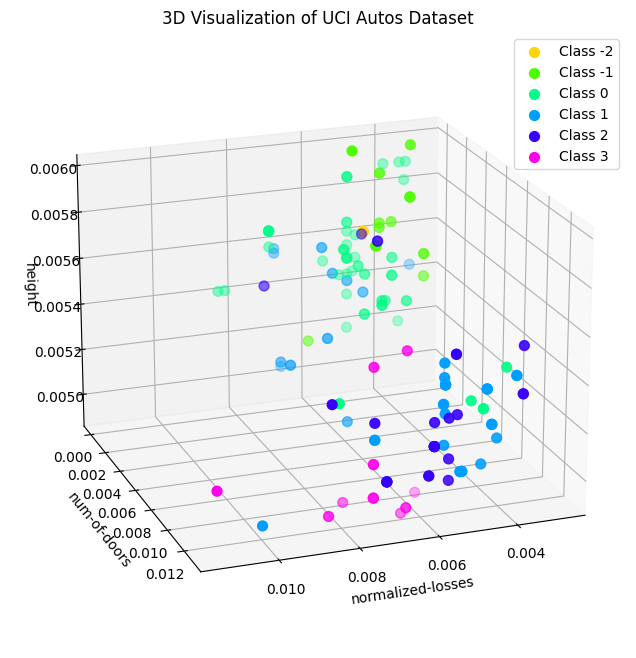

In [281]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = sns.color_palette("hsv", len(my_data_normalized['symboling'].unique()))

for label, color in zip(sorted(my_data_normalized['symboling'].unique()), colors):
    subset = my_data_normalized[my_data_normalized['symboling'] == label]
    ax.scatter(subset[top_3_features[0]], subset[top_3_features[1]], subset[top_3_features[2]],
               label=f'Class {label}', color=color, s=50)

ax.set_xlabel(top_3_features[0])
ax.set_ylabel(top_3_features[1])
ax.set_zlabel(top_3_features[2])
ax.view_init(elev=20, azim=70)
plt.title('3D Visualization of UCI Autos Dataset')
ax.legend()
plt.show()

6. Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 4, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

Возьмем для обучения два признака с наиболее высокой оценкой важности, чтобы при визуализации не пришлось переписывать и переобучать классификатор еще раз.

In [283]:
top_2_features = top_features[:2]

X = my_data_normalized[top_2_features]
y = my_data_normalized['symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130, 2), (56, 2), (130,), (56,))

In [284]:
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [285]:
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность на тестовой выборке: {accuracy:.2f}")

Точность на тестовой выборке: 0.64


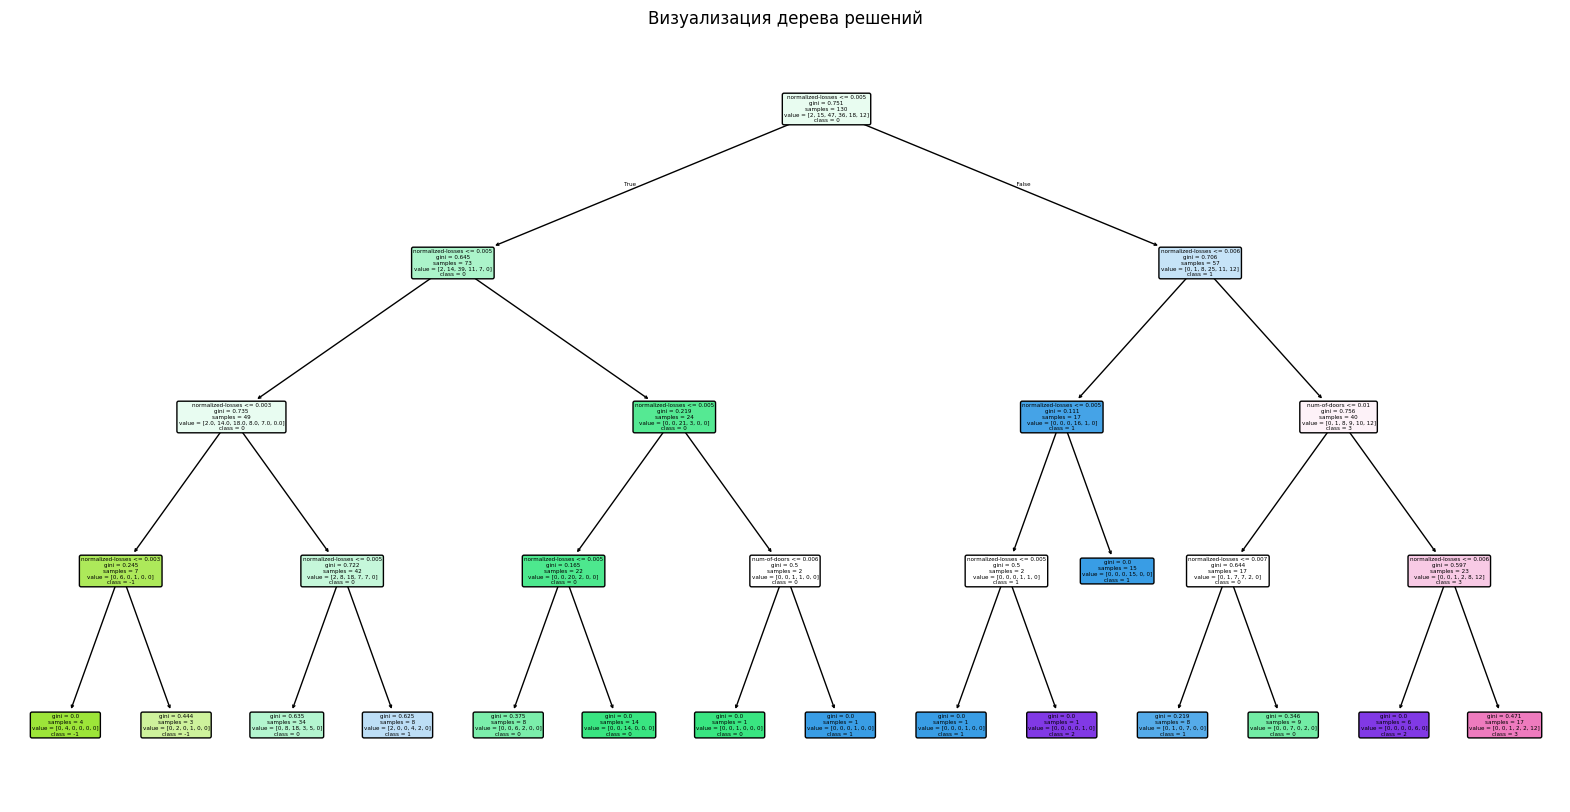

In [286]:
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], rounded=True)
plt.title("Визуализация дерева решений")
plt.show()

In [297]:
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)

    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)

    cmap = ListedColormap(['red', 'blue', 'green', 'orange', 'purple'])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=cmap, alpha=0.8)

    plt.xlim(X.iloc[:, 0].min() - 0.001, X.iloc[:, 0].max() + 0.001)
    plt.ylim(X.iloc[:, 1].min() - 0.01, X.iloc[:, 1].max() + 0.01)

    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

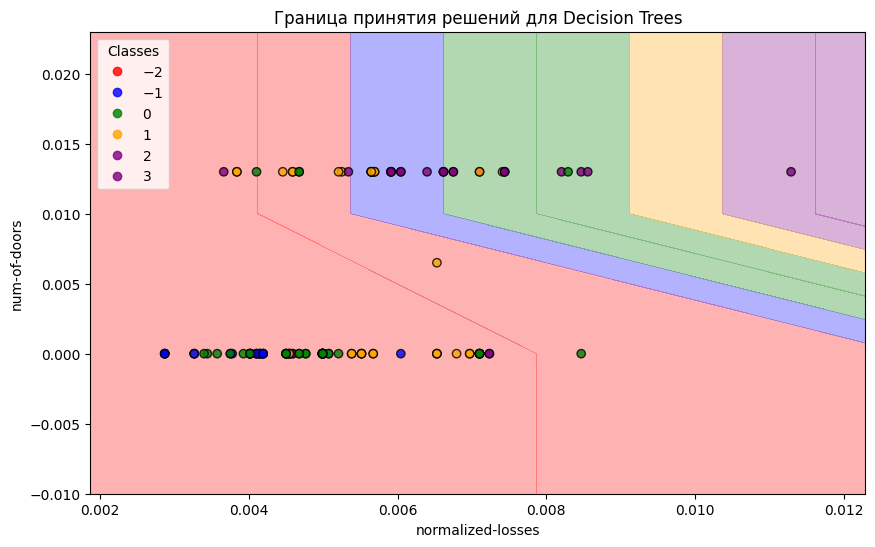

In [298]:
plot_decision_boundary(dt_clf, X_train, y_train, title="Граница принятия решений для Decision Trees")

Неудачная база данных.

7. Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании.

In [289]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score

nb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [290]:
nb_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)
y_pred_tree = dt_clf.predict(X_test)

In [291]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dt_clf),
    ('naive_bayes', nb_clf),
    ('knn', knn_clf)
], voting='hard')

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

In [292]:
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
recall_tree = recall_score(y_test, y_pred_tree, average='macro')
recall_voting = recall_score(y_test, y_pred_voting, average='macro')

print(f"Полнота для Наивного Байесовского классификатора: {recall_nb:.2f}")
print(f"Полнота для KNN классификатора (k=5): {recall_knn:.2f}")
print(f"Полнота для Дерева решений: {recall_tree:.2f}")
print(f"Полнота для Комбинированного классификатора (VotingClassifier): {recall_voting:.2f}")

Полнота для Наивного Байесовского классификатора: 0.51
Полнота для KNN классификатора (k=5): 0.80
Полнота для Дерева решений: 0.57
Полнота для Комбинированного классификатора (VotingClassifier): 0.74


8. Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании.

In [293]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

In [294]:
bagging_clf = BaggingClassifier(random_state=42)
bagging_clf.fit(X_train, y_train)

gboost_clf = GradientBoostingClassifier(random_state=42)
gboost_clf.fit(X_train, y_train)

y_pred_bagging = bagging_clf.predict(X_test)
y_pred_gboost = gboost_clf.predict(X_test)

In [295]:
recall_bagging = recall_score(y_test, y_pred_bagging, average='macro')
recall_gboost = recall_score(y_test, y_pred_gboost, average='macro')

print(f"Полнота для BaggingClassifier: {recall_bagging:.2f}")
print(f"Полнота для GradientBoostingClassifier: {recall_gboost:.2f}")

Полнота для BaggingClassifier: 0.65
Полнота для GradientBoostingClassifier: 0.81


9. Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок.

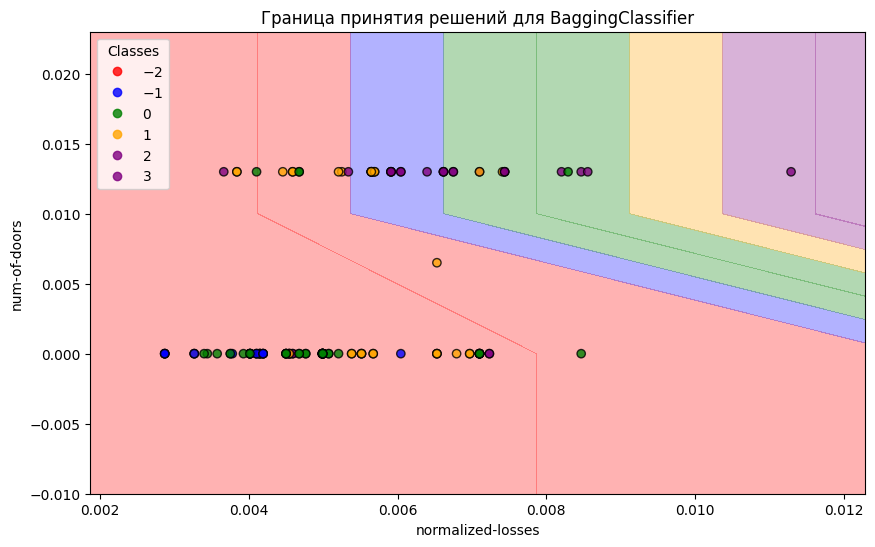

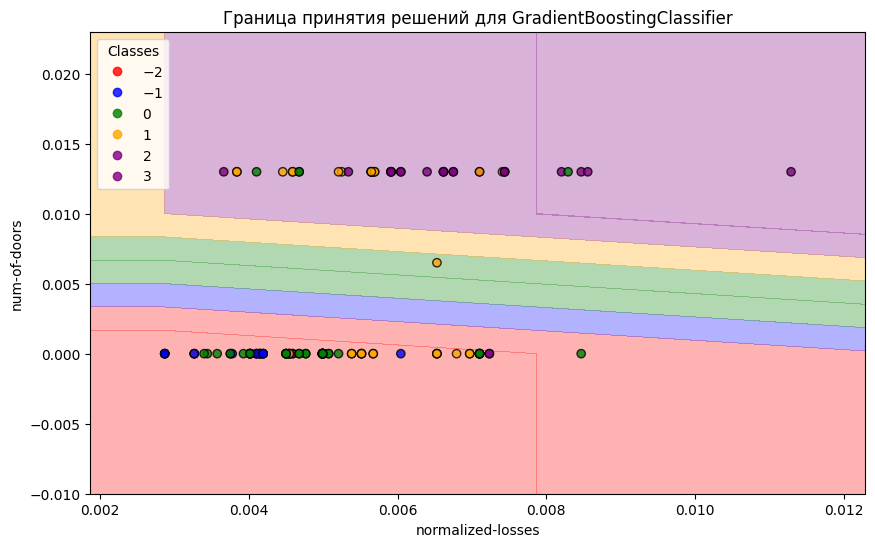

In [299]:
bagging_clf = BaggingClassifier(random_state=42)
bagging_clf.fit(X_train, y_train)

gboost_clf = GradientBoostingClassifier(random_state=42)
gboost_clf.fit(X_train, y_train)

plot_decision_boundary(bagging_clf, X_train, y_train, title="Граница принятия решений для BaggingClassifier")
plot_decision_boundary(gboost_clf, X_train, y_train, title="Граница принятия решений для GradientBoostingClassifier")

Неудачный пример БД для классификаторов.